In [75]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [76]:
def processName(config):
    results_name = f"embed_dim{config['embed_dim']}"
    results_name += "_active" if config["active"] else "_passive"
    results_name += "_saving_task_num" if config["saving_task_num"] else "_not_saving_task_num"
    if config["active"]:
        results_name += "_target_aware" if config["target_aware"] else "_target_agnostic"
    results_name += f"_target_sample_num{config['num_target_sample']}"
    results_name += f"_seed{config['task_embed_matrix_seed']}"
    return results_name

def processName2(config):
    results_name = f"embed_dim{config['embed_dim']}"
    results_name += f"_seed{config['task_embed_matrix_seed']}"
    results_name += f"_target_sample_num{config['num_target_sample']}"
    return results_name

## Mixed result -- linear

In [77]:
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": False,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

results = None
for seed in [12434]:
    for dataseed in [43, 500, 12434]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_linear/{filename}.csv")
                if active:
                    tmp["strategy"] = "AL_target_aware" if target_aware else "AL_target_agnostic"
                else:
                    tmp["strategy"] = "passive"
                tmp["saveTask"] = False
                tmp["seed"] = dataseed
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": True,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

for seed in [12434]:
    for dataseed in [43, 500, 12434]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_linear/{filename}.csv")
                if active:
                    tmp["strategy"] = "AL_target_aware_saveTask" if target_aware else "AL_target_agnostic_saveTask"
                else:
                    tmp["strategy"] = "passive_saveTask"
                tmp["saveTask"] = True
                tmp["seed"] = dataseed
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])

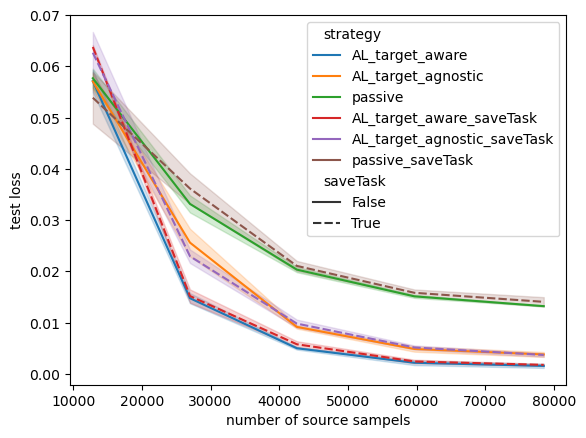

In [78]:
fig = sns.lineplot(x="budget", y="loss", data=results, hue="strategy", errorbar= ['se', 1], dashes=True, style="saveTask")
fig.set(xlabel ="number of source sampels", ylabel = "test loss")
fig = fig.get_figure()
fig.savefig(f"results/plots/{processName2(config)}_syntheticLoss_linear.pdf")

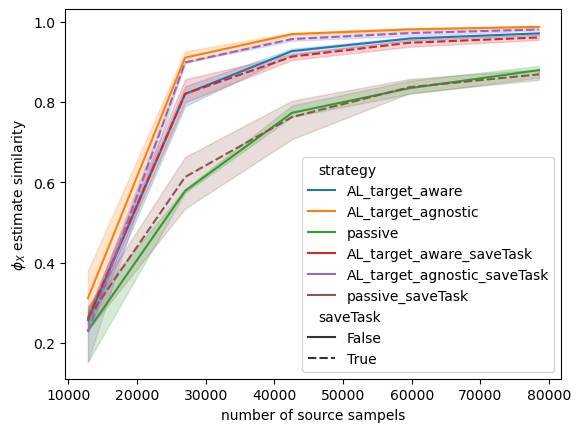

In [79]:
fig = sns.lineplot(x="budget", y="input_embed_space_est_similarities", data=results, hue="strategy", dashes=True, style="saveTask")
fig.set(xlabel ="number of source sampels", ylabel = "$\phi_X$ estimate similarity")
fig = fig.get_figure()
fig.savefig(f"results/plots/{processName2(config)}_syntheticSimilarity_linear.pdf")


In [80]:
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": False,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

results = None
for seed in [43]:
    for dataseed in [43, 500, 12434]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_linear/{filename}.csv")
                if active:
                    tmp["strategy"] = "AL_target_aware" if target_aware else "AL_target_agnostic"
                else:
                    tmp["strategy"] = "passive"
                tmp["saveTask"] = False
                tmp["seed"] = dataseed
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": True,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

for seed in [43]:
    for dataseed in [43, 500, 12434]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_linear/{filename}.csv")
                if active:
                    tmp["strategy"] = "AL_target_aware_saveTask" if target_aware else "AL_target_agnostic_saveTask"
                else:
                    tmp["strategy"] = "passive_saveTask"
                tmp["saveTask"] = True
                tmp["seed"] = dataseed
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])

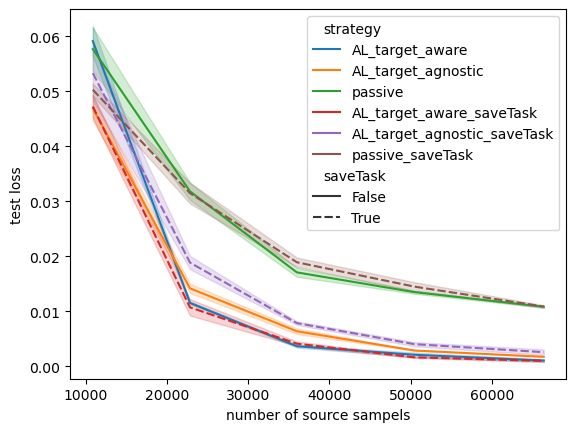

In [81]:
fig = sns.lineplot(x="budget", y="loss", data=results, hue="strategy", errorbar= ['se', 1], dashes=True, style="saveTask")
fig.set(xlabel ="number of source sampels", ylabel = "test loss")
fig = fig.get_figure()
fig.savefig(f"results/plots/{processName2(config)}_syntheticLoss_linear.pdf")

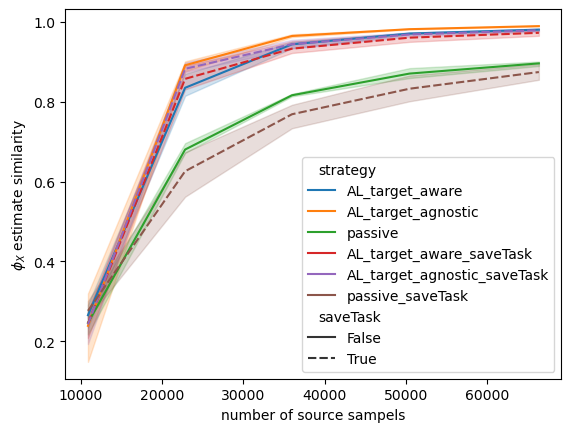

In [82]:
fig = sns.lineplot(x="budget", y="input_embed_space_est_similarities", data=results, hue="strategy",  dashes=True, style="saveTask")
fig.set(xlabel ="number of source sampels", ylabel = "$\phi_X$ estimate similarity")
fig = fig.get_figure()
fig.savefig(f"results/plots/{processName2(config)}_syntheticSimilarity_linear.pdf")

## Mixed-FeatureKernel

In [83]:
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": False,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

results = None
for seed in [12434]:
    for dataseed in [43, 500, 12434]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_nonlinearKernel/{filename}.csv")
                if active:
                    tmp["strategy"] = "AL_target_aware" if target_aware else "AL_target_agnostic"
                else:
                    tmp["strategy"] = "passive"
                tmp["saveTask"] = False
                tmp["seed"] = dataseed
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])

config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": True,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

for seed in [12434]:
    for dataseed in [43, 500, 12434]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_nonlinearKernel/{filename}.csv")
                if active:
                    tmp["strategy"] = "AL_target_aware_saveTask" if target_aware else "AL_target_agnostic_saveTask"
                else:
                    tmp["strategy"] = "passive_saveTask"
                tmp["saveTask"] = True
                tmp["seed"] = dataseed
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])

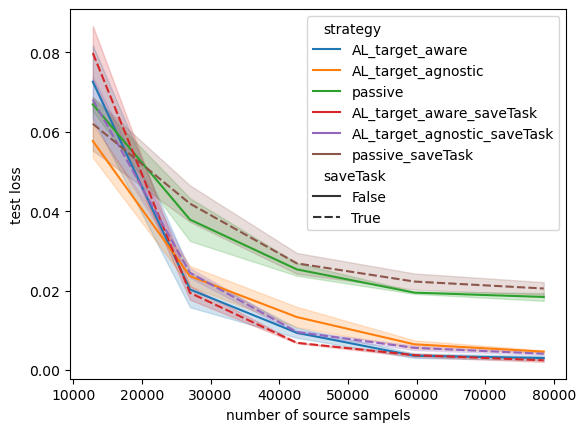

In [84]:
fig = sns.lineplot(x="budget", y="loss", data=results, hue="strategy", errorbar= ['se', 1], dashes=True, style="saveTask")
fig.set(xlabel ="number of source sampels", ylabel = "test loss")
fig = fig.get_figure()
fig.savefig(f"results/plots/{processName2(config)}_syntheticLoss_nonlinearKernel.pdf")

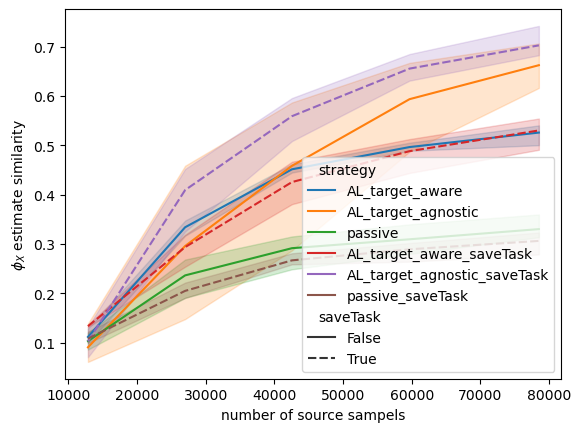

In [85]:
fig = sns.lineplot(x="budget", y="input_embed_space_est_similarities", data=results, hue="strategy", dashes=True, style="saveTask")
fig.set(xlabel ="number of source sampels", ylabel = "$\phi_X$ estimate similarity")
fig = fig.get_figure()
fig.savefig(f"results/plots/{processName2(config)}_syntheticSimilarity_nonlinearKernel.pdf")

In [86]:
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": False,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

results = None
for seed in [43]:
    for dataseed in [43, 500, 12434]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_nonlinearKernel/{filename}.csv")
                if active:
                    tmp["strategy"] = "AL_target_aware" if target_aware else "AL_target_agnostic"
                else:
                    tmp["strategy"] = "passive"
                tmp["saveTask"] = False
                tmp["seed"] = dataseed
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])

config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": True,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

for seed in [43]:
    for dataseed in [43, 500, 12434]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_nonlinearKernel/{filename}.csv")
                if active:
                    tmp["strategy"] = "AL_target_aware_saveTask" if target_aware else "AL_target_agnostic_saveTask"
                else:
                    tmp["strategy"] = "passive_saveTask"
                tmp["saveTask"] = True
                tmp["seed"] = dataseed
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])

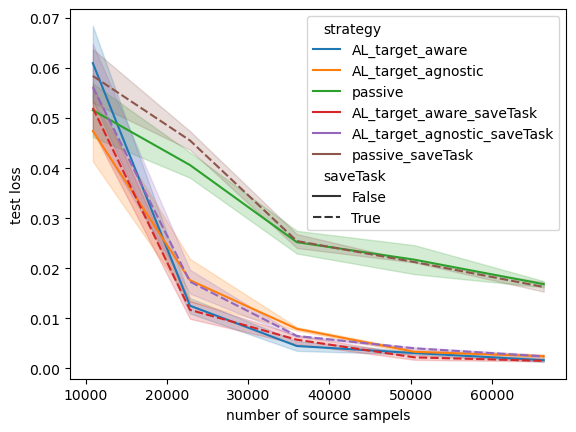

In [87]:
fig = sns.lineplot(x="budget", y="loss", data=results, hue="strategy", errorbar= ['se', 1], dashes=True, style="saveTask")
fig.set(xlabel ="number of source sampels", ylabel = "test loss")
fig = fig.get_figure()
fig.savefig(f"results/plots/{processName2(config)}_syntheticLoss_nonlinearKernel.pdf")

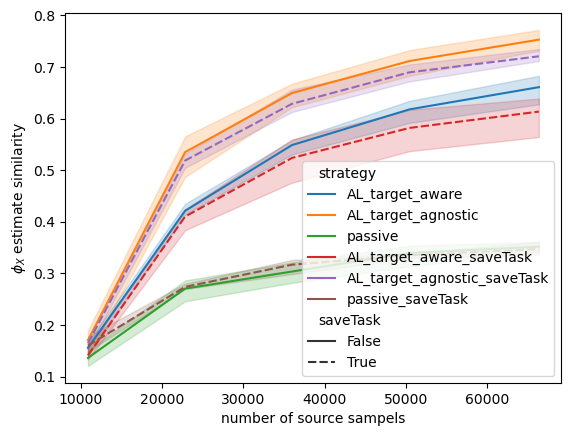

In [88]:
fig = sns.lineplot(x="budget", y="input_embed_space_est_similarities", data=results, hue="strategy", dashes=True, style="saveTask")
fig.set(xlabel ="number of source sampels", ylabel = "$\phi_X$ estimate similarity")
fig = fig.get_figure()
fig.savefig(f"results/plots/{processName2(config)}_syntheticSimilarity_nonlinearKernel.pdf")

### Neuralnet

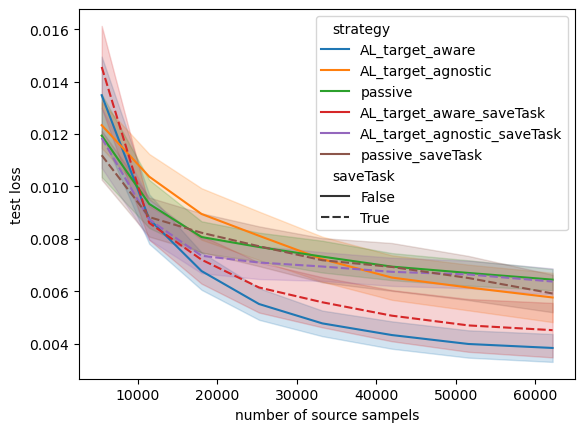

In [89]:
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": False,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

results = None
for seed in [43]:
    for dataseed in [43, 500, 12434, 425, 987, 26794, 56, 89, 1111, 89731]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                if dataseed is not None:
                    filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_shallow/{filename}.csv")
                if active:
                    tmp["strategy"] = "AL_target_aware" if target_aware else "AL_target_agnostic"
                else:
                    tmp["strategy"] = "passive"
                tmp["saveTask"] = False
                tmp["seed"] = dataseed if dataseed is not None else 0
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])

config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": True,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

for seed in [43]:
    for dataseed in [43, 500, 12434, 425, 987, 26794, 56, 89, 1111, 89731, 21312]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                if dataseed is not None:
                    filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_shallow/{filename}.csv")
                if active:
                    tmp["strategy"] = "AL_target_aware_saveTask" if target_aware else "AL_target_agnostic_saveTask"
                else:
                    tmp["strategy"] = "passive_saveTask"
                tmp["saveTask"] = True
                tmp["seed"] = dataseed if dataseed is not None else 0
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])

fig = sns.lineplot(x="budget", y="loss", data=results, hue="strategy", errorbar= ['se', 1], dashes=True, style="saveTask")
fig.set(xlabel ="number of source sampels", ylabel = "test loss")
fig = fig.get_figure()
fig.savefig(f"results/plots/{processName2(config)}_syntheticLoss_shallow.pdf")


<Axes: xlabel='budget', ylabel='loss'>

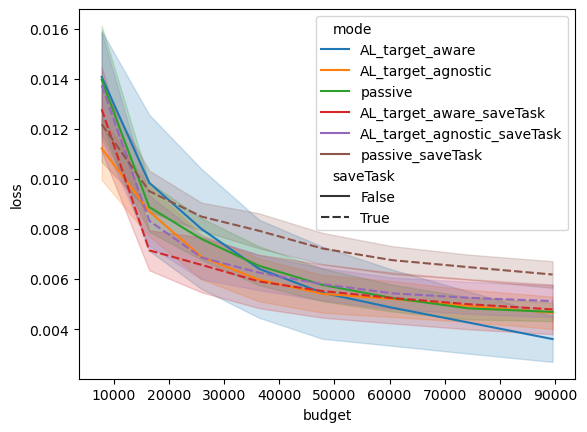

In [ ]:
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": False,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

results = None
for seed in [500]:
    for dataseed in [43, 500, 12434, 425, 987, 26794, 56, 89, 1111]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                if dataseed is not None:
                    filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_shallow/{filename}.csv")
                if active:
                    tmp["mode"] = "AL_target_aware" if target_aware else "AL_target_agnostic"
                else:
                    tmp["mode"] = "passive"
                tmp["saveTask"] = False
                tmp["seed"] = dataseed if dataseed is not None else 0
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])

config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": True,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

for seed in [500]:
    for dataseed in [43, 500, 12434, 425, 987, 26794, 56, 89, 1111]:
        for active in [True, False]:
            for target_aware in [True, False]:
                if not active and target_aware: continue
                config["task_embed_matrix_seed"] = seed
                config["active"] = active
                config["target_aware"] = target_aware
                filename = processName(config)
                if dataseed is not None:
                    filename += f"_data_seed{dataseed}"
                tmp = pd.read_csv(f"results/synthetic_shallow/{filename}.csv")
                if active:
                    tmp["mode"] = "AL_target_aware_saveTask" if target_aware else "AL_target_agnostic_saveTask"
                else:
                    tmp["mode"] = "passive_saveTask"
                tmp["saveTask"] = True
                tmp["seed"] = dataseed if dataseed is not None else 0
                if results is None:
                    results = tmp
                else:
                    results= pd.concat([results, tmp])

sns.lineplot(x="budget", y="loss", data=results, hue="mode", errorbar= ['se', 1], dashes=True, style="saveTask")
# plt.ylim([0, 0.01])
# plt.yscale("log")